In [71]:
import pandas as pd
import numpy as np
import os
import time
import subprocess
import re
import random
import arff

from pomegranate import BayesianNetwork
from math import sqrt
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import classification_report
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_loss
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_similarity_score

# Tree

In [108]:
def read_data(dataPath, X_file, y_file):
    # input: '/Volumes/Samsung_T5/research/data/ABC_news_data/obesity/'
    # read data
    data = pd.read_csv(os.path.join(dataPath,X_file))
    label = pd.read_csv(os.path.join(dataPath,y_file))
    return data,label

def get_structure(model, labels):
    dic = {}
    for item, attr in zip(model.structure, labels):
        if item == ():
            dic[attr] = {}
        else:
            dic[attr] = set(labels[list(item)])
    return dic

#Python program to print topological sorting of a DAG 
from collections import defaultdict 
    
def get_order(model, labels):
    
    g = Graph(len(labels))
    for item, i in zip(model.structure, range(len(labels))):
        if item == ():
            pass
        else:
            g.addEdge(i, list(item))
    
    # get order
    a = g.topologicalSort()
    a.reverse()

    return label_list[a]


emotions
Chow-liu Tree
{'amazed-suprised': [], 'happy-pleased': {'sad-lonely'}, 'relaxing-calm': {'amazed-suprised'}, 'quiet-still': {'amazed-suprised'}, 'sad-lonely': {'quiet-still'}, 'angry-aggresive': {'relaxing-calm'}}


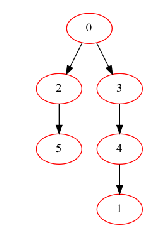

In [90]:
dataset = "emotions"
print(dataset)
dataPath = '/Volumes/Samsung_T5/research/data/small_datasets/'+dataset+"/"
X_file = "X.csv"
y_file = "y.csv"

data, label = read_data(dataPath, X_file, y_file) # read data
label_list = label.columns 

model = BayesianNetwork.from_samples(label, algorithm='chow-liu')
bayes_bet = get_structure(model, label_list)
print("Chow-liu Tree")
print(bayes_bet)
model.plot()

# DAG

DAG
{'amazed-suprised': {'relaxing-calm'}, 'happy-pleased': {'angry-aggresive', 'quiet-still', 'sad-lonely'}, 'relaxing-calm': [], 'quiet-still': {'amazed-suprised', 'angry-aggresive'}, 'sad-lonely': {'amazed-suprised', 'quiet-still'}, 'angry-aggresive': {'relaxing-calm'}}


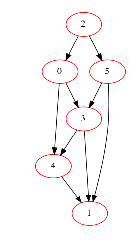

In [102]:
model = BayesianNetwork.from_samples(label, algorithm='exact-dp')
bayes_bet = get_structure(model, label_list)
print("DAG")
print(bayes_bet)
model.plot()

In [109]:
def get_order(model, labels):
    
    g = Graph(len(labels))
    for item, i in zip(model.structure, range(len(labels))):
        if item == ():
            pass
        else:
            g.addEdge(i, list(item))
    
    # get order
    a = g.topologicalSort()
    a.reverse()

    return label_list[a]

In [110]:
get_order(model, label.columns)

Index(['relaxing-calm', 'amazed-suprised', 'angry-aggresive', 'quiet-still',
       'sad-lonely', 'happy-pleased'],
      dtype='object')